In [1]:
import numpy as np
import pandas as pd
import json
from IPython.display import display_markdown

In [2]:
stats = pd.read_csv('summary.csv', index_col=0)

In [3]:
stats

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,fOArea_750 fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,...,Rms AGN SF_error z band HealpixSlicer,Median AGN SF_error z band HealpixSlicer,Max AGN SF_error z band HealpixSlicer,Min AGN SF_error z band HealpixSlicer,N(+3Sigma) AGN SF_error z band HealpixSlicer,N(-3Sigma) AGN SF_error z band HealpixSlicer,AGN SF_error z band HealpixSlicer,25th%ile AGN SF_error z band HealpixSlicer,75th%ile AGN SF_error z band HealpixSlicer,AreaThreshold AGN SF_error z band HealpixSlicer
baseline_nexp2_v1.7.1_10yrs,14469.422443,0.803857,846.0,781.0,1.025455,0.946667,18140.492848,2.324527,10.248834,4.894587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_retrofoot_v2.0_10yrs,17510.183320,0.972788,875.0,806.0,1.060606,0.976970,18175.743181,2.316875,9.982240,5.003306,...,0.028529,0.041893,0.375231,0.021676,510.0,0.0,28239.0,0.036523,0.058473,10157.970988
baseline_v2.0_10yrs,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,2.423048,10.034633,4.640184,...,0.028729,0.042319,0.397783,0.020434,564.0,0.0,29529.0,0.037055,0.055711,9874.289736
bluer_indx0_v2.0_10yrs,12849.585708,0.713866,839.0,788.0,1.016970,0.955152,18610.497289,2.350626,10.182448,4.696561,...,0.028581,0.042704,0.324028,0.018749,606.0,0.0,29590.0,0.037204,0.056184,9416.035406
bluer_indx1_v2.0_10yrs,12876.443105,0.715358,839.0,788.0,1.016970,0.955152,18601.265059,2.362545,9.878032,4.456829,...,0.028097,0.042427,0.349829,0.018333,530.0,0.0,29542.0,0.037006,0.056446,9976.683561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,5425.194123,0.301400,811.0,761.0,0.983030,0.922424,18365.423545,2.437678,7.285735,4.043599,...,0.026420,0.042226,0.399182,0.019181,596.0,0.0,29521.0,0.036882,0.055094,10094.184671
vary_nes_nesfrac0.55_v2.0_10yrs,4007.627156,0.222646,804.0,753.0,0.974545,0.912727,18135.457086,2.451520,7.047335,3.856870,...,0.026370,0.042666,0.317128,0.018756,624.0,0.0,29612.0,0.037025,0.055315,9717.341824
vary_nes_nesfrac0.75_v2.0_10yrs,2155.306081,0.119739,777.0,722.0,0.941818,0.875152,14727.924886,2.453626,6.999647,3.967350,...,0.026070,0.042729,0.382272,0.018341,596.0,0.0,29543.0,0.037454,0.054829,9337.981097
vary_nes_nesfrac1.00_v2.0_10yrs,5678.660803,0.315481,727.0,683.0,0.881212,0.827879,7271.640142,2.439489,6.766411,3.811837,...,0.026471,0.043446,0.327124,0.018654,694.0,0.0,29677.0,0.037881,0.055597,8962.816837


In [4]:
with open('opsim_list', 'r') as f:
    sims = f.readlines()
sims = [s.replace('\n', '') for s in sims]

In [5]:
sims

['baseline/baseline_v2.0_10yrs.db',
 'bluer/bluer_indx0_v2.0_10yrs.db',
 'bluer/bluer_indx1_v2.0_10yrs.db',
 'ddf/ddf_frac_ddf_per0.6_v2.0_10yrs.db',
 'ddf/ddf_frac_ddf_per1.6_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff0_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff0_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff1_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff1_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff2_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff2_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff3_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff3_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff4_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff4_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff5_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff5_delayed-1_v2.0_10yrs.db',
 'long_gaps/long_gaps_nightsoff6_delayed1827_v2.0_10yrs.db',
 'long_gaps/long_gaps_night

In [6]:
# family - run name - short description - filepath - release/version - likely reference - long description

In [7]:
# Look at the 'families' in the first part of the names above - put in a reasonable order
families = ['baseline', 'retro',
            'rolling', 'rolling_bulge',
            'rolling_bulge_6', 'rolling_six', 'rolling_early',
            'rolling_all_sky', 'noroll',
            'bluer', 'long_u', 
            'vary_nes', 'vary_gp', 
            'presto', 'presto_half', 'long_gaps', 'long_gaps_nopair',
            'vary_expt', 'ddf', 'microsurveys' ]
for s in [s.split('/')[0] for s in sims]:
    if s not in families:
        print(s)

baseline_nexp2_v1.7.1


In [8]:
family = {}
rootURL = 'http://epyc.astro.washington.edu/~lynnej/opsim_downloads/fbs_2.0/'
for f in families:
    family[f] = {}
    family[f]['run'] = [s.split('/')[-1].replace('.db', '') for s in sims if s.split('/')[0] == f]
    # Placeholder in output
    family[f]['brief'] = [s.split('/')[-1].replace('.db', '').replace('_10yrs', '').replace('_v2.0', ' ').replace('_', ' ')
                          for s in sims if s.split('/')[0] == f] 
    family[f]['filepath'] = [s for s in sims if s.split('/')[0] == f]
    family[f]['version'] = '2.0'
    family[f]['reference'] = 'baseline_v2.0_10yrs'
    family[f]['description'] = f'**{f}** :'
    family[f]['url'] = [f"{rootURL}{s}" for s in sims if s.split('/')[0] == f]

In [9]:
list(family.keys())

['baseline',
 'retro',
 'rolling',
 'rolling_bulge',
 'rolling_bulge_6',
 'rolling_six',
 'rolling_early',
 'rolling_all_sky',
 'noroll',
 'bluer',
 'long_u',
 'vary_nes',
 'vary_gp',
 'presto',
 'presto_half',
 'long_gaps',
 'long_gaps_nopair',
 'vary_expt',
 'ddf',
 'microsurveys']

In [10]:
# Sort runs within each family (the ones that might need it)
k = 'rolling'
# order by rolling strength first
tmp = [r.split('_')[2] for r in family[k]['run']]
family[k]['run'] = [r for _, r in sorted(zip(tmp, family[k]['run']))]

k = 'presto'
# split by 'mix' or not .. not sure if this will be the final choice?
tmp = [r for r in family[k]['run'] if 'mix' not in r] + [r for r in family[k]['run'] if 'mix' in r] 
family[k]['run'] = tmp

k = 'presto_half'
# split by 'mix' or not .. not sure if this will be the final choice?
tmp = [r for r in family[k]['run'] if 'mix' not in r] + [r for r in family[k]['run'] if 'mix' in r] 
family[k]['run'] = tmp

k = 'long_gaps'
# order by 'delay 5 years' or not
tmp = [r.split('_')[3] for r in family[k]['run']]
tt = [r for _, r in sorted(zip(tmp, family[k]['run']))]
# Reverse the order so the most impactful is last
tt.reverse()
family[k]['run'] = tt

k = 'long_gaps_nopair'
# order by 'delay 5 years' or not
tmp = [r.split('_')[4] for r in family[k]['run']]
tt = [r for _, r in sorted(zip(tmp, family[k]['run']))]
# Reverse the order so the most impactful is last
tt.reverse()
family[k]['run'] = tt

k = 'microsurveys'
# Pull the kinds of microsurveys together ..
tmp = list(set([r.split('_')[0] for r in family[k]['run']]))
# Put some of these microsurveys early or together
early = ['virgo', 'carina', 'smc', 'roman', 'local', 'too', 'north', 'short', 'multi', 'twilight']
tt = [e for e in early if e in tmp]
tt2 = [t for t in tmp if t not in tt]
tmp = tt + tt2
# and then organize them within kind by amount of impact expected
micros = []
for t in tmp:
    tt = [r for r in family[k]['run'] if r.startswith(t)]
    tt.sort()
    # But the twilight NEO ones are complicated .. order by hand I guess
    if t == 'twilight':
        #twilight_neo_nightpattern1v2.0_10yrs.db, Twilight neo observations every night (1)
        #twilight_neo_nightpattern2v2.0_10yrs.db, Twilight neo observations every other night (1/2)
        #twilight_neo_nightpattern5v2.0_10yrs.db, Twilight neo observations 4 night on 4 off (1/2)
        #twilight_neo_nightpattern6v2.0_10yrs.db, Twilight neo observations 3 night on 4 off (3/7)
        #twilight_neo_nightpattern3v2.0_10yrs.db, Twilight neo observations 1 night on 2 off (1/3)
        #twilight_neo_nightpattern7v2.0_10yrs.db, Twilight neo observations 2 night on 4 off (2/6 = 1/3)        
        #twilight_neo_nightpattern4v2.0_10yrs.db, Twilight neo observations 1 night on 3 off (1/4)
        # Looks like this matches stats.loc[tt][m].sort_values('fONv MinNvis fO WFD HealpixSlicer')
        tt = list(stats.loc[tt]['fONv MinNvis fO WFD HealpixSlicer'].sort_values().index)
        tt.reverse()
    micros += tt
family[k]['run'] = micros

In [11]:
# Add brief descriptions
with open('run_descriptions.txt', 'r') as f:
    descriptions = f.readlines()
descriptions = [d.replace('.db,', ' == ').replace('.db', ' == ').replace('\n', '') for d in descriptions]
descr = {}
for d in descriptions:
    r = d.split('==')[0].rstrip(' ')
    dd = d.split('==')[-1].lstrip(' ')
    descr[r] = dd

In [12]:
for f in family:
    runs = family[f]['run']
    brief = []
    for r in runs:
        if r not in descr:
            print(f'Missing description for {r}')
            brief.append(f"{r.replace('.db', '').replace('_10yrs', '').replace('_v2.0', ' ').replace('_', ' ')}")
        else:
            brief.append(descr[r])
    family[f]['brief'] = brief

In [13]:
family['microsurveys']['brief']

['Add the virgo cluster to WFD footprint',
 'One week per year observing Carina',
 'Two nights of observing the SMC in movie mode',
 'Microsurvey of the Roman bulge field',
 "Increase local galaxy coverage {'g': 0.5, 'r': 0.2, 'i': 0.1}",
 "Increasing local galaxy coverage {'g': 1.0, 'r': 0.3, 'i': 0.1}",
 "Increasing local galaxy coverage {'g': 1.5, 'r': 0.35, 'i': 0.2}",
 'Follow up ToO alerts, 10 events per year',
 'Follow up ToO alerts, 50 events per year',
 'Add a north stripe to Dec +30',
 'Take up to 3 short (5s) visits in year 1',
 'Multiple (4) short (5s) exposures in each filter in a year, stop after 12.',
 'Twilight neo observations 1 night on 3 off',
 'Twilight neo observations 2 night on 4 off',
 'Twilight neo observations 1 night on 2 off',
 'Twilight neo observations 3 night on 4 off',
 'Twilight neo observations 4 night on 4 off',
 'Twilight neo observations every other night',
 'Twilight neo observations every night']

In [14]:
# Might as well edit the long descriptions here, as it turns out to not wrap properly in json editors
k = 'baseline'
family[k]['description'] = f'**{k}** : The v2.0 baseline simulation. This features a modified survey footprint '\
    'with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. '\
    'Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is '\
    'maintained, at lower levels. Filter balance is modified in different areas of the sky. '\
    'A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. '

k = 'retro'
family[k]['description'] = f'**{k}** : The retro family provides two simulations to bridge the gap between ' \
    'previous sets of simulations and the updated baseline. One (retro_baseline) uses the current code base '\
    'to re-run the previous baseline (i.e. this is baseline_nexp2_v1.7.1_10yrs, but run with rubin_sim) '\
    'while the other (retrofoot) uses updated code settings but re-creates the baseline_nexp2_v1.7.1_10yrs '\
    'footprint. These are primarily intended to help users understand potential changes in their metric results '\
    'from the 1.x series of runs to the v2.0 runs, as well as the modification from sims_maf to rubin_sim.'

k = 'rolling'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. These simulations extend upon and modify this rolling cadence in the dust-free WFD '\
    'including using 3 regions instead of 2, and adding variable weight ("strength") to the level of rolling.'

k = 'rolling_bulge'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. These simulations add a rolling cadence in the WFD-level area of the galactic plane. '\
    'The rolling in the bulge is implemented in 2-regions, with varying weights (or strengths).'

k = 'rolling_all_sky'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. This simulations adds a 2-region rolling cadence on all parts of the sky, including '\
    'all parts of the galactic plane, the northern ecliptic spur, and the south celestial pole.'

k = 'rolling_bulge_6'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. This simulation add a 6-region rolling cadence to the galactic bulge WFD-level area '\
    'in addition.'

k = 'rolling_six'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. These simulations modify this rolling cadence in the dust-free WFD '\
    'to use 6 regions instead of 2, with variable weight ("strength") to the level of rolling.'

k = 'rolling_early'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. In the baseline, rolling cadence starts at year 1.5 and ends at 8.5, so that each '\
    'rolling "season" is an entire season length. This simulation modifies the timing, so that rolling '\
    'starts at the end of year 1 and ends at year 9. The time available for rolling is longer, although may be '\
    'split; the time available for all-sky surveying for astrometric purposes is maintained. Data releases may '\
    'be potentially more uniform (TBD).'

k = 'noroll'
family[k]['description'] = f'**{k}** : The updated baseline contains a 2-band rolling cadence with strength ~90% '\
    'in the dust-free WFD. This simulation removes the rolling cadence completely.'

k = 'bluer'
family[k]['description'] = f'**{k}** : The standard filter balance in the dust-free WFD in the baseline is '\
    "{'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter "\
    "balance, skewing it bluer. One simulation adds visits to g band,"\
    "while the other adds visits to both u and g band, in each case by taking some visits from rizy."

k = 'long_u'
family[k]['description'] = f'**{k}** : The baseline survey uses 2x15s visits for all bands except u band. In the '\
    'baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to '\
    'the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, '\
    'the total amount of survey time spent on u band is kept the same, so the number of visits is reduced '\
    'accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number '\
    'of visits in u.'

k = 'vary_nes'
family[k]['description'] = f'**{k}** : These simulations investigate the effect of varying the amount of survey '\
    'time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of '\
    'visits over the remainder of the footprint, are kept the same. '

k = 'vary_gp'
family[k]['description'] = f'**{k}** : These simulations investigate the effect of varying the amount of survey '\
    'time spent on covering the background (non-WFD-level) Galactic Plane area. '\
    'The baseline characteristics, including the ratio of visits over the remainder of the footprint, '\
    'are kept the same.'

k = 'presto'
family[k]['description'] = f'**{k}** : The baseline survey strategy takes pairs of visits every few nights, where '\
    'the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. '\
    'These simulations investigate adding a third visit after a time period of between 1.5 to 4 hours. The '\
    'triplet visit is in one of the same filters as the earlier pair. This set '\
    'of simulations take triplets all the time, in the filter combinations described in their brief descriptions.'

k = 'presto_half'
family[k]['description'] = f'**{k}** : The baseline survey strategy takes pairs of visits every few nights, where '\
    'the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. '\
    'These simulations investigate adding a third visit after a time period of between 1.5 to 4 hours. The '\
    'triplet visit is in one of the same filters as the earlier pair. This set '\
    'of simulations take triplets every other night, in the filter combinations described in their brief descriptions.'

k = 'long_gaps'
family[k]['description'] = f'**{k}** : The baseline survey strategy takes pairs of visits every few nights, where'\
    'the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. '\
    'These simulations add a third visit after a variable time period of between 2 to 7 hours. The '\
    'triplet visit is in one of the same filters as the earlier pair, and only occurs if the first pair is in '\
    'contained within griz filters. In some of the simulations, these triplet visits are obtained throughout '\
    'the survey, while for other simulations the triplets do not start until year 5.'

k = 'long_gaps_nopair'
family[k]['description'] = f'**{k}** : The baseline survey strategy takes pairs of visits every few nights, where'\
    'the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. '\
    'These simulations extend the gap between the pair of visits, modifying it to a variable time period '\
    'of between 2 to 7 hours. The pair of visits are both in the same filter, in any of griz '\
    '(g+r, r+i, or i+z pairs). In some of the simulations, these triplet visits are obtained throughout '\
    'the survey, while for other simulations the triplets do not start until year 5.'

k = 'vary_expt'
family[k]['description'] = f'**{k}** : The baseline survey strategy uses 2x15s visits for grizy filters, and '\
    '1x30s visits for u band. This simulation attempts to make the individual image depth more consistent by '\
    'varying the exposure time depending on conditions. Each visit could have an on-sky exposure time of between '\
    '20s to 100s.'

k = 'ddf'
family[k]['description'] = f'**{k}** : The baseline survey strategy adds five Deep Drilling Fields, each allocated '\
    'about 1% of the total survey observing time, for about 5% total. '\
    'In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. '\
    'It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next '\
    'six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.'

k = 'microsurveys'
family[k]['description'] = f'**{k}** : There are special programs which can achieve additional science beyond or '\
    'supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". '\
    'These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.'

In [15]:
display_markdown(family['ddf']['description'], raw=True)

**ddf** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.

In [16]:
with (open('runs_v2.0.json', 'w')) as f:
      print(json.dumps(family, indent=2), file=f)

!head runs_v2.0.json

{
  "baseline": {
    "run": [
      "baseline_v2.0_10yrs"
    ],
    "brief": [
      "v2.0 baseline"
    ],
    "filepath": [
      "baseline/baseline_v2.0_10yrs.db"


In [17]:
with open('runs_v2.0.json', 'r') as f:
    da = json.load(f)

da

{'baseline': {'run': ['baseline_v2.0_10yrs'],
  'brief': ['v2.0 baseline'],
  'filepath': ['baseline/baseline_v2.0_10yrs.db'],
  'version': '2.0',
  'reference': 'baseline_v2.0_10yrs',
  'description': '**baseline** : The v2.0 baseline simulation. This features a modified survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. ',
  'url': ['http://epyc.astro.washington.edu/~lynnej/opsim_downloads/fbs_2.0/baseline/baseline_v2.0_10yrs.db']},
 'retro': {'run': ['baseline_retrofoot_v2.0_10yrs',
   'retro_baseline_v2.0_10yrs'],
  'brief': ['v1.x footprint but new code capabilities',
   'v1.x baseline with rubin_sim (without new code capabilities)'],
  'filepath': ['retro/

In [18]:
d = pd.DataFrame(family)
d2 = d.T.explode(['run', 'brief', 'filepath']).set_index('run', append=True)
#d  
d2

brief  \
             run                                                                                       
baseline     baseline_v2.0_10yrs                                                       v2.0 baseline   
retro        baseline_retrofoot_v2.0_10yrs                  v1.x footprint but new code capabilities   
             retro_baseline_v2.0_10yrs             v1.x baseline with rubin_sim (without new code...   
rolling      rolling_ns2_rw0.5_v2.0_10yrs                           Rolling half-sky (2 regions) 50%   
             rolling_ns3_rw0.5_v2.0_10yrs                          Rolling third-sky (3 regions) 50%   
...                                                                                              ...   
microsurveys twilight_neo_nightpattern3v2.0_10yrs         Twilight neo observations 1 night on 2 off   
             twilight_neo_nightpattern6v2.0_10yrs         Twilight neo observations 3 night on 4 off   
             twilight_neo_nightpattern5v2.0_10yrs         Twilight neo observations 4 night on 4 off   
             twilight_neo_nightpattern2v2.0_10yrs        Twilight neo observations every other night   
             twilight_neo_nightpattern1v2.0_10yrs              Twilight neo observations every night   

                                                                                            filepath  \
             run                                                                                       
baseline     baseline_v2.0_10yrs                                     baseline/baseline_v2.0_10yrs.db   
retro        baseline_retrofoot_v2.0_10yrs                    retro/baseline_retrofoot_v2.0_10yrs.db   
             retro_baseline_v2.0_10yrs                            retro/retro_baseline_v2.0_10yrs.db   
rolling      rolling_ns2_rw0.5_v2.0_10yrs                    rolling/rolling_ns2_rw0.5_v2.0_10yrs.db   
             rolling_ns3_rw0.5_v2.0_10yrs                    rolling/rolling_ns2_rw0.9_v2.0_10yrs.db   
...                                                                                              ...   
microsurveys twilight_neo_nightpattern3v2.0_10yrs  microsurveys/local_gals/local_gal_bindx0_v2.0_...   
             twilight_neo_nightpattern6v2.0_10yrs           microsurveys/carina/carina_v2.0_10yrs.db   
             twilight_neo_nightpattern5v2.0_10yrs     microsurveys/short_exp/short_exp_v2.0_10yrs.db   
             twilight_neo_nightpattern2v2.0_10yrs     microsurveys/smc_movie/smc_movie_v2.0_10yrs.db   
             twilight_neo_nightpattern1v2.0_10yrs  microsurveys/multi_short/multi_short_v2.0_10yr...   

                                                  version  \
             run                                            
baseline     baseline_v2.0_10yrs                      2.0   
retro        baseline_retrofoot_v2.0_10yrs            2.0   
             retro_baseline_v2.0_10yrs                2.0   
rolling      rolling_ns2_rw0.5_v2.0_10yrs             2.0   
             rolling_ns3_rw0.5_v2.0_10yrs             2.0   
...                                                   ...   
microsurveys twilight_neo_nightpattern3v2.0_10yrs     2.0   
             twilight_neo_nightpattern6v2.0_10yrs     2.0   
             twilight_neo_nightpattern5v2.0_10yrs     2.0   
             twilight_neo_nightpattern2v2.0_10yrs     2.0   
             twilight_neo_nightpattern1v2.0_10yrs     2.0   

                                                             reference  \
             run                                                         
baseline     baseline_v2.0_10yrs                   baseline_v2.0_10yrs   
retro        baseline_retrofoot_v2.0_10yrs         baseline_v2.0_10yrs   
             retro_baseline_v2.0_10yrs             baseline_v2.0_10yrs   
rolling      rolling_ns2_rw0.5_v2.0_10yrs          baseline_v2.0_10yrs   
             rolling_ns3_rw0.5_v2.0_10yrs          baseline_v2.0_10yrs   
...                                                                ...   
mic

In [19]:
da = pd.read_json('runs_v2.0.json', orient='index')
da

,run,brief,filepath,version,reference,description,url
baseline,[baseline_v2.0_10yrs],[v2.0 baseline],[baseline/baseline_v2.0_10yrs.db],2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,[http://epyc.astro.washington.edu/~lynnej/opsi...
retro,"[baseline_retrofoot_v2.0_10yrs, retro_baseline...","[v1.x footprint but new code capabilities, v1....","[retro/baseline_retrofoot_v2.0_10yrs.db, retro...",2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,"[rolling_ns2_rw0.5_v2.0_10yrs, rolling_ns3_rw0...","[Rolling half-sky (2 regions) 50%, Rolling thi...","[rolling/rolling_ns2_rw0.5_v2.0_10yrs.db, roll...",2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge,"[rolling_bulge_ns2_rw0.5_v2.0_10yrs, rolling_b...","[Roll in the bulge with 2 regions, 50%, Roll i...",[rolling_bulge/rolling_bulge_ns2_rw0.5_v2.0_10...,2,baseline_v2.0_10yrs,**rolling_bulge** : The updated baseline conta...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge_6,[rolling_bulge_6_v2.0_10yrs],[Roll the bulge in 6 stripes (low-dust WFD in ...,[rolling_bulge_6/rolling_bulge_6_v2.0_10yrs.db],2,baseline_v2.0_10yrs,**rolling_bulge_6** : The updated baseline con...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_six,"[six_rolling_ns6_rw0.5_v2.0_10yrs, six_rolling...","[Rolling in one-sixth sky (6 regions) 50%, Rol...",[rolling_six/six_rolling_ns6_rw0.5_v2.0_10yrs....,2,baseline_v2.0_10yrs,**rolling_six** : The updated baseline contain...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_early,[roll_early_v2.0_10yrs],[Start rolling year 1],[rolling_early/roll_early_v2.0_10yrs.db],2,baseline_v2.0_10yrs,**rolling_early** : The updated baseline conta...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_all_sky,[rolling_all_sky_ns2_rw0.9_v2.0_10yrs],[Roll on all parts of the sky],[rolling_all_sky/rolling_all_sky_ns2_rw0.9_v2....,2,baseline_v2.0_10yrs,**rolling_all_sky** : The updated baseline con...,[http://epyc.astro.washington.edu/~lynnej/opsi...
noroll,[noroll_v2.0_10yrs],[v2.0 baseline with no rolling],[noroll/noroll_v2.0_10yrs.db],2,baseline_v2.0_10yrs,**noroll** : The updated baseline contains a 2...,[http://epyc.astro.washington.edu/~lynnej/opsi...
bluer,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[bluer/bluer_indx0_v2.0_10yrs.db, bluer/bluer_...",2,baseline_v2.0_10yrs,**bluer** : The standard filter balance in the...,[http://epyc.astro.washington.edu/~lynnej/opsi...


In [20]:
rolling = [r for r in da.index.values if r.startswith('rolling')]
rolling

rolling = da.index.str.startswith('rolling')
da.index[rolling]

Index(['rolling', 'rolling_bulge', 'rolling_bulge_6', 'rolling_six',
       'rolling_early', 'rolling_all_sky'],
      dtype='object')

In [21]:
# Two ways to get the simulation names from the dataframe .. 
tmp = []
for r  in da.loc[rolling]['run']:
    tmp += r
tmp

# (this new 'explode' method is kind of useful)
t = da.loc[rolling]['run'].explode().values
t

array(['rolling_ns2_rw0.5_v2.0_10yrs', 'rolling_ns3_rw0.5_v2.0_10yrs',
       'rolling_ns2_rw0.9_v2.0_10yrs', 'rolling_ns3_rw0.9_v2.0_10yrs',
       'rolling_bulge_ns2_rw0.5_v2.0_10yrs',
       'rolling_bulge_ns2_rw0.8_v2.0_10yrs',
       'rolling_bulge_ns2_rw0.9_v2.0_10yrs', 'rolling_bulge_6_v2.0_10yrs',
       'six_rolling_ns6_rw0.5_v2.0_10yrs',
       'six_rolling_ns6_rw0.9_v2.0_10yrs', 'roll_early_v2.0_10yrs',
       'rolling_all_sky_ns2_rw0.9_v2.0_10yrs'], dtype=object)

In [22]:
rolling = [r for r in family if r.startswith('rolling')]
tmp = []
for f in rolling:
    tmp += family[f]['run']
tmp

['rolling_ns2_rw0.5_v2.0_10yrs',
 'rolling_ns3_rw0.5_v2.0_10yrs',
 'rolling_ns2_rw0.9_v2.0_10yrs',
 'rolling_ns3_rw0.9_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.5_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.8_v2.0_10yrs',
 'rolling_bulge_ns2_rw0.9_v2.0_10yrs',
 'rolling_bulge_6_v2.0_10yrs',
 'six_rolling_ns6_rw0.5_v2.0_10yrs',
 'six_rolling_ns6_rw0.9_v2.0_10yrs',
 'roll_early_v2.0_10yrs',
 'rolling_all_sky_ns2_rw0.9_v2.0_10yrs']

In [23]:
# Just check that the names in the summary stat dataframe line up with the simulation names from the databases..

allsims = np.unique(da['run'].explode().values)
print(len(allsims))

count = 0
for s in allsims:
    if s not in stats.index:
        print(s)
    else:
        count += 1
print(f'accounted for {count} sims')

# Note that the stats index includes baseline_nexp2_v1.7.1_10yrs
len(stats.index)

126
accounted for 126 sims


128

In [33]:
allsims = da['run'].explode().values

In [25]:
[m for m in stats if 'fO' in m]

['fOArea fO All visits HealpixSlicer',
 'fOArea/benchmark fO All visits HealpixSlicer',
 'fONv MedianNvis fO All visits HealpixSlicer',
 'fONv MinNvis fO All visits HealpixSlicer',
 'fONv/benchmark MedianNvis fO All visits HealpixSlicer',
 'fONv/benchmark MinNvis fO All visits HealpixSlicer',
 'fOArea_750 fO All visits HealpixSlicer',
 'fOArea fO WFD HealpixSlicer',
 'fOArea/benchmark fO WFD HealpixSlicer',
 'fONv MedianNvis fO WFD HealpixSlicer',
 'fONv MinNvis fO WFD HealpixSlicer',
 'fONv/benchmark MedianNvis fO WFD HealpixSlicer',
 'fONv/benchmark MinNvis fO WFD HealpixSlicer',
 'fOArea_750 fO WFD HealpixSlicer']

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot(df, normed=True, style=None, figsize=(10, 6), run_nicknames=None):
    """Plot a DataFrame of metric values.

    Parameters
    ---------
    df: pd.DataFrame
        The dataframe of metric values to plot
    normed: bool, opt
        Is the dataframe normalized or not? (default True)
        If true, adds +/- 5% lines to output
    style: list, opt
        Optional list of line color/style values to use for the plotted metric values
    figsize: tuple, opt
        Figure size
    run_nicknames: list, opt
        Replace the run names in the dataframe with these nicknames
    """
    df.plot(figsize=figsize, style=style)
    plt.legend(loc=(1.01, 0))
    if normed:
        plt.axhline(0.95, alpha=0.3, linestyle=':')
        plt.axhline(1.0, alpha=0.3, linestyle='--')
        plt.axhline(1.05, alpha=0.3, linestyle=':')
    if run_nicknames is not None:
        xnames = run_nicknames
    else:
        xnames = df.index.values
    xi = np.arange(len(xnames))
    plt.xticks(xi, xnames, rotation=90, fontsize='large')
    plt.xlim(0, len(xnames)-1)
    plt.grid('k:', alpha=0.3)
    plt.tight_layout()

/var/folders/tr/bjzqy0h17kx31fhndw6050d80000gn/T/ipykernel_45920/3752465733.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


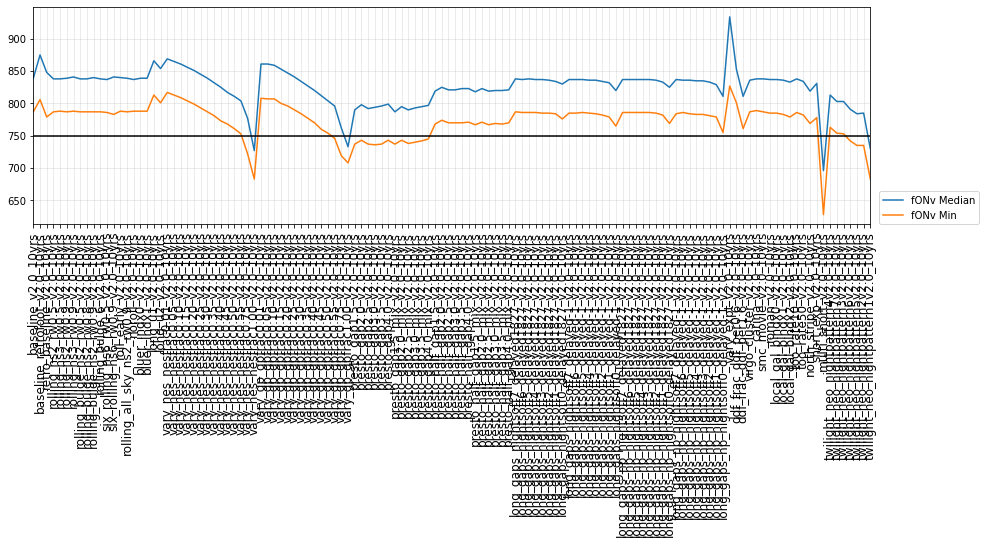

In [41]:
m = ['fONv MedianNvis fO All visits HealpixSlicer', 'fONv MinNvis fO All visits HealpixSlicer',]
dt = stats[m].loc[allsims]
dt.columns = ['fONv Median', 'fONv Min']
plot(dt, normed=False, figsize=(15, 4))
plt.axhline(750, color='k')